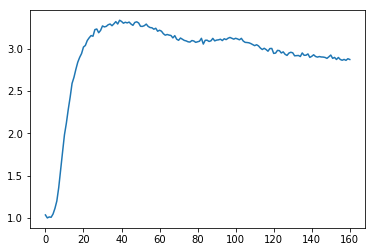

In [18]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def avgCurves(*array): #averages the curves to get a curve to fit parameters to
    size = 0
    for item in array:
        if len(item) > size:
            size = len(item)
    avgArray = []
    summation = 0
    for number in range(0, size):
        for item in array:
            summation += item[number]
        avgArray.append(summation / len(array))
        summation = 0
    return avgArray
def normalize(standardCurve, *array): #normalizes the data to a standard curve to compare model data to reality.
    #Assumes fluorescence maps to molecule count linearly. To not make this assumption and use this technique, you need
    #to find g(array)/g(standardCurve), where g is the function that maps fluorescence to molecule count. Then, normalize
    #the model in this way and compare them.
    size = 0
    for item in array:
        if len(item) > size:
            size = len(item)
    normArray = []
    summation = 0
    for item in range(0, len(array)):
        normArray.append([])
        for number in range(0, size):
            standard = standardCurve[number]
            raw = array[item][number]
            normArray[item].append(raw / standard)
    return normArray

dat = pd.read_excel('mRFPspin_3replicates_DNAhl_201705.xls', sep=' ')
dat.columns = list(range(0,161))

HHa = dat.iloc[0:3] #High DNA conc, spinach (mRNA) - 5nM DNA
LHa = dat.iloc[10:13] #Low DNA conc, spinach (mRNA) - 0.5 nM DNA

HHa1 = HHa.iloc[0,:]*1.5
HHa2 = HHa.iloc[1,:]
HHa3 = HHa.iloc[2,:]
avgH = avgCurves(HHa1, HHa2, HHa3)

LHa1 = LHa.iloc[0,:]*1.1
LHa2 = LHa.iloc[1,:]
LHa3 = LHa.iloc[2,:]
avgL = avgCurves(LHa1, LHa2, LHa3)

norm = normalize(avgL, avgL, avgH)

#Plot high DNA conc mSpinach
#plt.plot(HHa1)
#plt.plot(HHa2)
#plt.plot(HHa3)
#plt.plot(avgH)

#Plot low DNA conc mSpinach
#plt.plot(LHa1)
#plt.plot(LHa2)
#plt.plot(LHa3)
#plt.plot(avgL)

plt.plot(norm[1])